In [1]:
%load_ext autoreload
%autoreload 2
!RUST_BACKTRACE=1 cargo run -- ../models/rover.mo -t ../templates/dae_builder4.jinja > rover_casadi.py

    Finished ]8;;https://doc.rust-lang.org/cargo/reference/profiles.html#default-profiles\`dev` profile [unoptimized + debuginfo]]8;;\ target(s) in 0.07s
     Running `/home/micah/Research/parol/rumoca_parol/target/debug/rumoca ../models/rover.mo -t ../templates/dae_builder4.jinja`


In [93]:
!RUST_BACKTRACE=1 cargo run -- -v ../models/quadrotor.mo > quadrotor.json

    Finished ]8;;https://doc.rust-lang.org/cargo/reference/profiles.html#default-profiles\`dev` profile [unoptimized + debuginfo]]8;;\ target(s) in 0.09s
     Running `/home/micah/Research/parol/rumoca_parol/target/debug/rumoca -v ../models/quadrotor.mo`


In [2]:
import rover_casadi
import numpy as np
import matplotlib.pyplot as plt

model = rover_casadi.Model("rover")
tgrid, res = model.simulate(tf=9, dt=0.01)

# Visualize the solution
plt.figure(1)
plt.clf()
plt.plot(tgrid, res['xf'][0, :].T)
plt.grid()
plt.show()

# plt.plot(tgrid, res['x'].T)
# plt.grid()

/home/micah/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
CasADi - 2025-04-25 14:48:05 WARNING("DaeBuilder::pre has not been implemented: Returning identity mapping") [.../casadi/core/dae_builder.cpp:744]


TypeError: Model.simulate() missing 1 required positional argument: 't0'

In [162]:
w = model.dae.w()
w

['m_1_moment',
 'm_2_moment',
 'm_3_moment',
 'm_4_moment',
 'R_z',
 'F_x',
 'F_y',
 'F_z',
 'M_x',
 'M_y',
 'M_z',
 'm_1_omega_ref',
 'm_1_thrust',
 'm_2_omega_ref',
 'm_2_thrust',
 'm_3_omega_ref',
 'm_3_thrust',
 'm_4_omega_ref',
 'm_4_thrust']

nx = 4, nz = 0, nq = 0, ny = 0, np = 3, nc = 0, nd = 0, nw = 3, nu = 2
Variables
  t = [time]
  p = [l, r, m1_tau]
  x = [m1_omega, x, y, theta]
  w = [a, v, m1_omega_ref]
  u = [thr, str]
Dependent variables ('w'): 
  a := 1
  v := (r*m1_omega)
  m1_omega_ref := thr
Differential equations
  \dot{m1_omega} == __der__m1_omega := ((m1_omega_ref-m1_omega)/m1_tau)
  \dot{x} == __der__x := (v*cos(theta))
  \dot{y} == __der__y := (v*sin(theta))
  \dot{theta} == __der__theta := ((v/l)*tan(str))


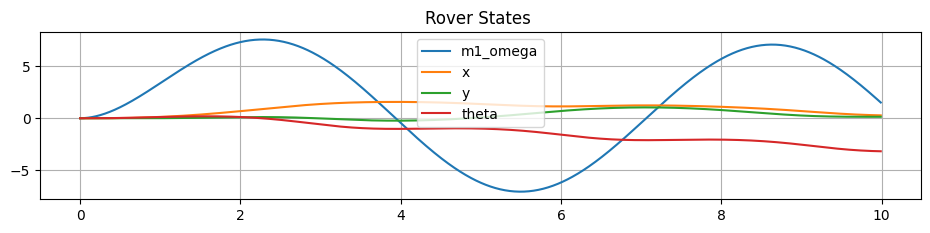

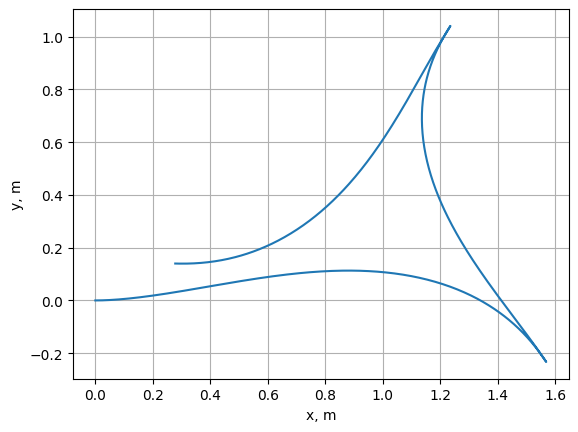

In [11]:
def sim_and_plotting(model, f_u):

    states = model.dae.x()
    params = model.dae.p()
    w = model.dae.w()

    x0 = np.zeros(len(model.dae.x()))
    param_vals = model.dae.start(params)


    tgrid, res = model.simulate(t0=0, tf=10, dt=0.01, f_u=u)

    plt.figure(figsize=(25, 10))

    plt.subplot(4, 2, 1)
    plt.plot(tgrid, res['xf'].T, label=model.dae.x())
    plt.grid()
    plt.title('Rover States ')
    plt.legend()
    

    plt.figure()
    #plt.plot(res['t'], res['x'].T);
    plt.plot(res['xf'][1, :].T, res['xf'][2, :].T)
    plt.xlabel('x, m')
    plt.ylabel('y, m')
    plt.grid()

def f_u(t):
    return np.array([
        10*np.sin(t), #throttle
        np.cos(t) #steering
        ])

model = rover_casadi.Model("rover")
model.display()

tgrid = np.arange(0, 10, 0.01)
u = f_u(tgrid)
sim_and_plotting(model, u)